In [ ]:
import sys

sys.path.append("../")

In [19]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import pyproj
from global_land_mask import globe

In [ ]:
epsg = "3035"
ds_root_path = "/home/knowit/Home_Foresee/forseeModel/data/copernicus/nrt/copernicus-processed-data/"
T = 100
thetao = (
    xr.open_dataset(ds_root_path + "CMEMS-GLOBAL_001_024-thetao-2020_2023.nc")
    .isel(depth=0, time=T)
    .thetao
)
so = (
    xr.open_dataset(ds_root_path + "CMEMS-GLOBAL_001_024-so-2020_2023.nc")
    .isel(depth=0, time=T)
    .so
)

In [ ]:
lat_bnds = (49, 82.5)
lon_bnds = (-43.5, 48)
prediction_ir = 0.5

x = np.load("/home/knowit/Home_Foresee/forseeModel/animations/day1_preds.npy")
x = x[:100, ..., 4]
# fish = xr.DataArray(
#     x[...,4],
#     dims=["time", "longitude", "latitude"],
#     coords=dict(
#         time=pd.date_range('2022-03-03', '2022-09-30', freq="1D"),
#         longitude=np.linspace(*lon_bnds, 184),
#         latitude=np.linspace(*lat_bnds, 68),
#     )
# )
x.shape

(100, 184, 68)

In [ ]:
from PIL import Image

factor = 2
new_shape = (100, 184 * factor, 68 * factor)
upscaled = np.zeros(new_shape)

for i in range(100):
    im = Image.fromarray(x[i])
    im_interp = im.resize((68 * factor, 184 * factor), Image.BICUBIC)
    im_interp_arr = np.array(im_interp)
    upscaled[i] = np.clip(im_interp_arr, a_min=0, a_max=None)

In [47]:
upscaled.shape

(100, 736, 272)

In [ ]:
pd.date_range(
    "2022-03-03", pd.to_datetime("2022-03-03") + pd.to_timedelta("99D"), freq="1D"
).shape

(100,)

In [ ]:
fish = xr.DataArray(
    upscaled,
    dims=["time", "longitude", "latitude"],
    coords=dict(
        time=pd.date_range(
            "2022-03-03",
            pd.to_datetime("2022-03-03") + pd.to_timedelta("99D"),
            freq="1D",
        ),
        longitude=np.linspace(*lon_bnds, 184 * factor),
        latitude=np.linspace(*lat_bnds, 68 * factor),
    ),
)
fish

<xarray.DataArray (time: 100, longitude: 736, latitude: 272)>
array([[[8.28428019e-04, 7.84438394e-04, 6.86931249e-04, ...,
         1.02549265e-07, 1.17202376e-07, 1.23812242e-07],
        [7.90546066e-04, 7.48571765e-04, 6.55531476e-04, ...,
         9.71596705e-08, 1.11042709e-07, 1.17305206e-07],
        [7.06565916e-04, 6.69056957e-04, 5.85914182e-04, ...,
         8.50096313e-08, 9.71577023e-08, 1.02637543e-07],
        ...,
        [1.17493248e-04, 1.11187641e-04, 9.72052803e-05, ...,
         7.04596605e-05, 7.64469514e-05, 7.91334242e-05],
        [1.34046888e-04, 1.26852887e-04, 1.10900568e-04, ...,
         7.95200685e-05, 8.64422109e-05, 8.95507255e-05],
        [1.41517012e-04, 1.33922120e-04, 1.17080817e-04, ...,
         8.35990577e-05, 9.09459195e-05, 9.42461775e-05]],

       [[8.23449693e-04, 7.79722002e-04, 6.82795362e-04, ...,
         1.02563945e-07, 1.17219130e-07, 1.23829935e-07],
        [7.85794458e-04, 7.44070101e-04, 6.51583832e-04, ...,
         9.71735830e-08, 1.11058583e-07, 1.17321960e-07],
        [7.02316349e-04, 6.65030908e-04, 5.82383538e-04, ...,
         8.50218314e-08, 9.71716219e-08, 1.02652244e-07],
...
        [1.17493248e-04, 1.11187641e-04, 9.72052803e-05, ...,
         7.51247135e-05, 8.12489088e-05, 8.39834902e-05],
        [1.34046888e-04, 1.26852887e-04, 1.10900568e-04, ...,
         8.47943156e-05, 9.18868682e-05, 9.50577523e-05],
        [1.41517012e-04, 1.33922120e-04, 1.17080817e-04, ...,
         8.91480668e-05, 9.66806692e-05, 1.00049838e-04]],

       [[1.06049515e-03, 1.00444746e-03, 8.80226144e-04, ...,
         1.02267883e-07, 1.16881417e-07, 1.23473427e-07],
        [1.01329316e-03, 9.59747937e-04, 8.41072469e-04, ...,
         9.68931460e-08, 1.10738696e-07, 1.16984268e-07],
        [9.08688991e-04, 8.60685483e-04, 7.54291657e-04, ...,
         8.47755217e-08, 9.68906591e-08, 1.02355635e-07],
        ...,
        [1.17493248e-04, 1.11187641e-04, 9.72052803e-05, ...,
         7.61404226e-05, 8.23211958e-05, 8.50801734e-05],
        [1.34046888e-04, 1.26852887e-04, 1.10900568e-04, ...,
         8.59410939e-05, 9.31004615e-05, 9.63003113e-05],
        [1.41517012e-04, 1.33922120e-04, 1.17080817e-04, ...,
         9.03539403e-05, 9.79580291e-05, 1.01358237e-04]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-03-03 2022-03-04 ... 2022-06-10
  * longitude  (longitude) float64 -43.5 -43.38 -43.25 ... 47.75 47.88 48.0
  * latitude   (latitude) float64 49.0 49.12 49.25 49.37 ... 82.25 82.38 82.5

In [ ]:
df = pd.read_csv(
    "/home/knowit/Home_Foresee/forseeModel/animations/predict_sild_upscaled_masked.csv"
)
df

,date,fish,prediction,lat,lon
0,2022-10-08,Sild,172.20879,50.613007,-43.500000
1,2022-10-08,Sild,172.20630,50.737085,-43.500000
2,2022-10-08,Sild,172.20630,51.605627,-43.500000
3,2022-10-08,Sild,172.20630,51.729705,-43.500000
4,2022-10-08,Sild,172.20630,51.853782,-43.500000
...,...,...,...,...,...
808191,2022-10-14,Sild,339.97200,55.576107,46.878401
808192,2022-10-14,Sild,345.65494,55.700185,46.878401
808193,2022-10-14,Sild,302.02103,55.824262,46.878401
808194,2022-10-14,Sild,237.17120,55.948339,46.878401


In [ ]:
df[["date", "lat", "lon"]]

In [ ]:
phys = xr.open_dataset(
    "/home/knowit/Home_Foresee/forseeModel/data/copernicus/my/copernicus-processed-data/CMEMS-GLOBAL_001_030-uo_vo_so_thetao-2011_2020.nc"
).isel(depth=0, time=T)
cur = np.sqrt(phys.uo**2 + phys.vo**2)

In [ ]:
bio = xr.open_dataset(
    ds_root_path + "CMEMS-GLOBAL_001_028-several_vars-2020_2023.nc"
).isel(depth=0, time=T)
bio

<xarray.Dataset>
Dimensions:    (latitude: 133, longitude: 361)
Coordinates:
  * latitude   (latitude) float32 50.0 50.25 50.5 50.75 ... 82.5 82.75 83.0
    depth      float32 0.494
    time       datetime64[ns] 2021-02-09T12:00:00
  * longitude  (longitude) float32 -35.0 -34.75 -34.5 -34.25 ... 54.5 54.75 55.0
Data variables:
    spco2      (latitude, longitude) float32 ...
    o2         (latitude, longitude) float32 ...
    chl        (latitude, longitude) float32 ...
    no3        (latitude, longitude) float32 ...
    po4        (latitude, longitude) float32 ...
    phyc       (latitude, longitude) float32 ...
    si         (latitude, longitude) float32 ...
    ph         (latitude, longitude) float32 ...
    talk       (latitude, longitude) float32 ...
    nppv       (latitude, longitude) float32 ...
    dissic     (latitude, longitude) float32 ...
    fe         (latitude, longitude) float32 ...
Attributes: (12/19)
    product:                       GLOBAL_ANALYSIS_FORECAST_BIO_001_028
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         daily mean fields from Global Ocean Biogeo...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    forecast_type:                 forecast
    bulletin_date:                 2023-04-05 00:00:00
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [5]:
lon_grid1, lat_grid1 = np.meshgrid(bio.longitude, bio.latitude)
lon_grid2, lat_grid2 = np.meshgrid(cur.longitude, cur.latitude)

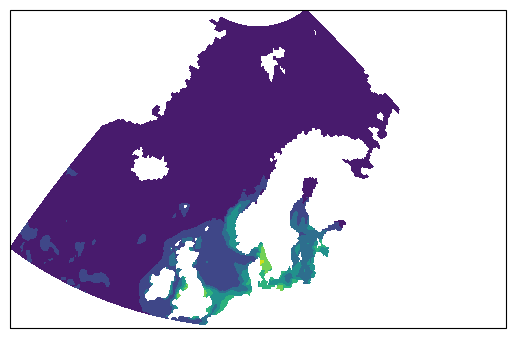

In [ ]:
ax = plt.axes(projection=ccrs.epsg(epsg))
c = plt.contourf(lon_grid1, lat_grid1, bio.chl, transform=ccrs.PlateCarree())
plt.show()

In [ ]:
class Plot:
    def __init__(self, h=1, w=5, extent=None):
        self.i = 1
        self.h = h
        self.w = w
        self.axes = []
        self.meshes = []
        self.extent = extent if extent is not None else [-6, 22, 55, 75]

    def __call__(self, var, title):
        lon_grid, lat_grid = np.meshgrid(var.longitude, var.latitude)
        ax = plt.subplot(self.h, self.w, self.i, projection=ccrs.epsg(epsg))
        ax.set_facecolor("#E4E1DB")
        ax.coastlines()
        mesh = ax.pcolormesh(lon_grid, lat_grid, var, transform=ccrs.PlateCarree())
        ax.set_extent(self.extent)
        ax.set_title(title)
        self.axes.append(ax)
        self.meshes.append(ax)
        self.i += 1
        return ax, mesh


def plot_var(var, i):
    lon_grid, lat_grid = np.meshgrid(var.longitude, var.latitude)
    ax = plt.subplot(1, 5, i, projection=ccrs.epsg(epsg))
    ax.set_facecolor("#E4E1DB")
    ax.pcolormesh(lon_grid, lat_grid, var, transform=ccrs.PlateCarree())
    ax.set_extent([-6, 22, 55, 75])
    return ax

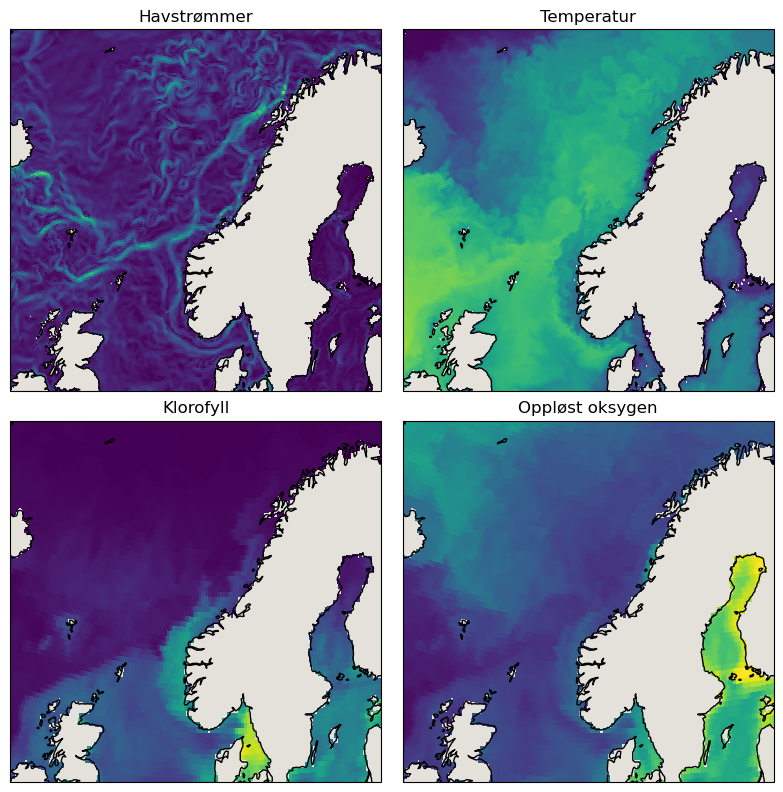

In [ ]:
fig = plt.figure(figsize=(8, 8))
p = Plot(2, 2, extent=[-9, 22, 55, 72])
# p(cur, 'Havstrømmer')
# p(thetao, 'Temperatur')
# p(bio.chl, 'Klorofyll')
# p(bio.o2, 'Oppløst oksygen')


p(cur, "Currents")
p(thetao, "Temperature")
p(bio.chl, "Chlorophyl")
p(bio.o2, "Dissolved Oxygen")

plt.tight_layout()
plt.show()

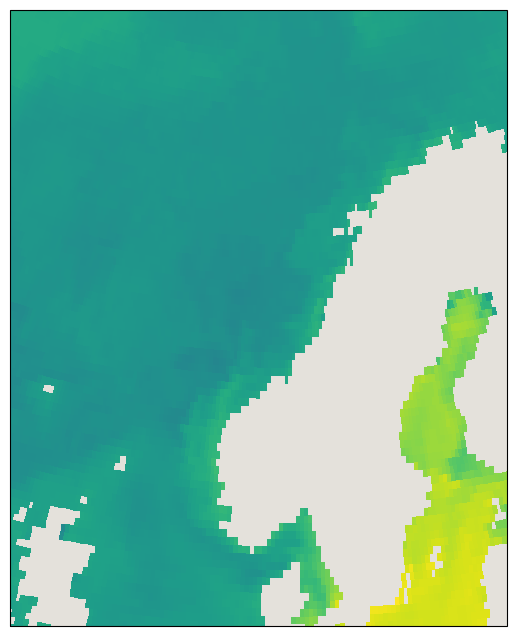

In [ ]:
fig = plt.figure(figsize=(18, 8))
ax = plt.axes(projection=ccrs.epsg(epsg))
# ax.stock_img()
# ax.coastlines(linewidth=.8)
ax.set_facecolor("#E4E1DB")
ax.pcolormesh(lon_grid, lat_grid, bio.ph, transform=ccrs.PlateCarree())
# ax.pcolormesh(x_grid, y_grid, new_theta_grid)
# ax.pcolormesh(x_grid, y_grid, result_data_quick[::-1])
# ax.set_extent([-8, 12, 56, 66])
ax.set_extent([-6, 22, 55, 75])
plt.show()

In [ ]:
thetao.sizes["latitude"]

397

In [ ]:
# thetao = xr.open_dataset(ds_root_path + 'CMEMS-GLOBAL_001_024-thetao-2020_2023.nc').isel(depth=0, time=slice(None, 365)).thetao

stream = xr.open_dataset(ds_root_path + "CMEMS-GLOBAL_001_024-uo_vo-2020_2023.nc").isel(
    depth=0, time=slice(None, 100)
)
# cur =  np.sqrt(stream.uo**2 + stream.vo**2)
cur = stream.uo**2 + stream.vo**2

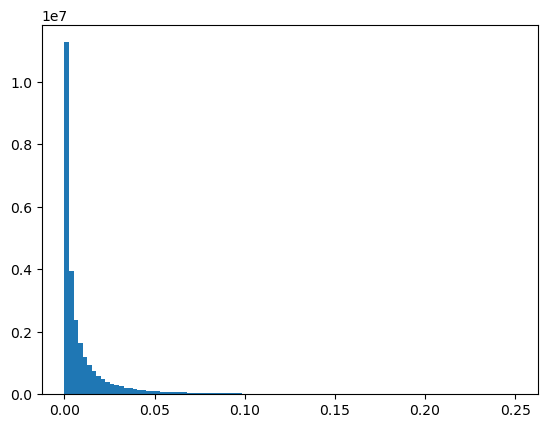

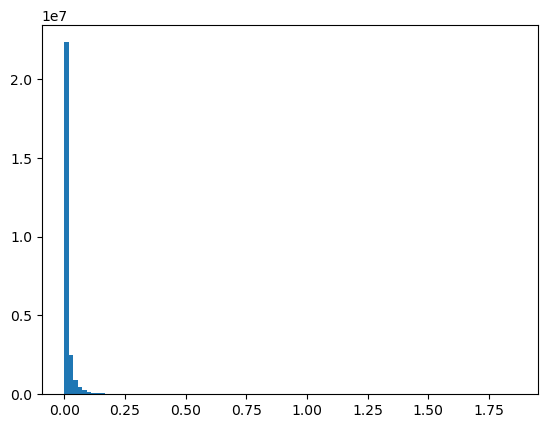

In [ ]:
plt.hist(np.ravel(cur.values), bins=np.linspace(0.0, 0.25, 100))
plt.show()
plt.hist(np.ravel(cur.values), bins=100)
plt.show()

In [ ]:
epsg = "3035"
ds_root_path = "/home/knowit/Home_Foresee/forseeModel/data/copernicus/nrt/copernicus-processed-data/"
T = 120
thetao = (
    xr.open_dataset(ds_root_path + "CMEMS-GLOBAL_001_024-thetao-2020_2023.nc")
    .isel(depth=0)
    .thetao
)
so = (
    xr.open_dataset(ds_root_path + "CMEMS-GLOBAL_001_024-so-2020_2023.nc")
    .isel(depth=0)
    .so
)

In [ ]:
stream = xr.open_dataset(ds_root_path + "CMEMS-GLOBAL_001_024-uo_vo-2020_2023.nc").isel(
    depth=0
)
cur = np.sqrt(stream.uo**2 + stream.vo**2)

In [ ]:
bio = xr.open_dataset(
    ds_root_path + "CMEMS-GLOBAL_001_028-several_vars-2020_2023.nc"
).isel(depth=0)
bio

<xarray.Dataset>
Dimensions:    (time: 895, latitude: 133, longitude: 361)
Coordinates:
  * latitude   (latitude) float32 50.0 50.25 50.5 50.75 ... 82.5 82.75 83.0
    depth      float32 0.494
  * time       (time) datetime64[ns] 2020-11-01T12:00:00 ... 2023-04-14T12:00:00
  * longitude  (longitude) float32 -35.0 -34.75 -34.5 -34.25 ... 54.5 54.75 55.0
Data variables:
    spco2      (time, latitude, longitude) float32 ...
    o2         (time, latitude, longitude) float32 ...
    chl        (time, latitude, longitude) float32 ...
    no3        (time, latitude, longitude) float32 ...
    po4        (time, latitude, longitude) float32 ...
    phyc       (time, latitude, longitude) float32 ...
    si         (time, latitude, longitude) float32 ...
    ph         (time, latitude, longitude) float32 ...
    talk       (time, latitude, longitude) float32 ...
    nppv       (time, latitude, longitude) float32 ...
    dissic     (time, latitude, longitude) float32 ...
    fe         (time, latitude, longitude) float32 ...
Attributes: (12/19)
    product:                       GLOBAL_ANALYSIS_FORECAST_BIO_001_028
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         daily mean fields from Global Ocean Biogeo...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    forecast_type:                 forecast
    bulletin_date:                 2023-04-05 00:00:00
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [ ]:
class Plot:
    def __init__(self, h=1, w=5, extent=None, bgcolor="#E4E1DB", t0=0):
        self.i = 1
        self.h = h
        self.w = w
        self.t0 = t0
        self.axes = []
        self.meshes = []
        self.data = []
        self.extent = extent if extent is not None else [-6, 22, 55, 75]
        self.bgcolor = bgcolor

    def __call__(self, var, title):
        lon_grid, lat_grid = np.meshgrid(var.longitude, var.latitude)
        ax = plt.subplot(self.h, self.w, self.i, projection=ccrs.epsg(epsg))
        ax.set_facecolor(self.bgcolor)
        ax.coastlines()
        mesh = ax.pcolormesh(
            lon_grid, lat_grid, var.isel(time=self.t0), transform=ccrs.PlateCarree()
        )
        ax.set_extent(self.extent)
        ax.set_title(title)
        self.axes.append(ax)
        self.meshes.append(mesh)
        self.data.append(var)
        self.i += 1
        return ax, mesh

    def update(self, i):
        for mesh, map_data in zip(self.meshes, self.data):
            frame = map_data.isel(time=self.t0 + i)
            mesh.set_array(frame.values.ravel())

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter


# bfbfbd dark gray
# E4E1DB sand
def animate_map(
    map_data, epsg="3035", extent=(-9, 22, 55, 72), bgcolor="#E4E1DB", n_frames=50
):
    fig = plt.figure(figsize=(10, 10), dpi=100)
    p = Plot(2, 2, extent=[-9, 22, 55, 72], bgcolor=bgcolor, t0=100)
    # p(cur, 'Havstrømmer')
    # p(thetao, 'Temperatur')
    # p(bio.chl, 'Klorofyll')
    # p(bio.o2, 'Oppløst oksygen')

    p(cur, "Currents")
    p(thetao, "Temperature")
    p(bio.chl, "Chlorophyll")
    p(bio.o2, "Dissolved Oxygen")

    first_frame = map_data.isel(time=0)
    # vmin, vmax = 0., .5
    plt.tight_layout()

    def init():
        return p.meshes

    def animate(i):
        p.update(i)
        return p.meshes

    anim = FuncAnimation(fig, animate, frames=n_frames, interval=500, blit=True)

    return anim

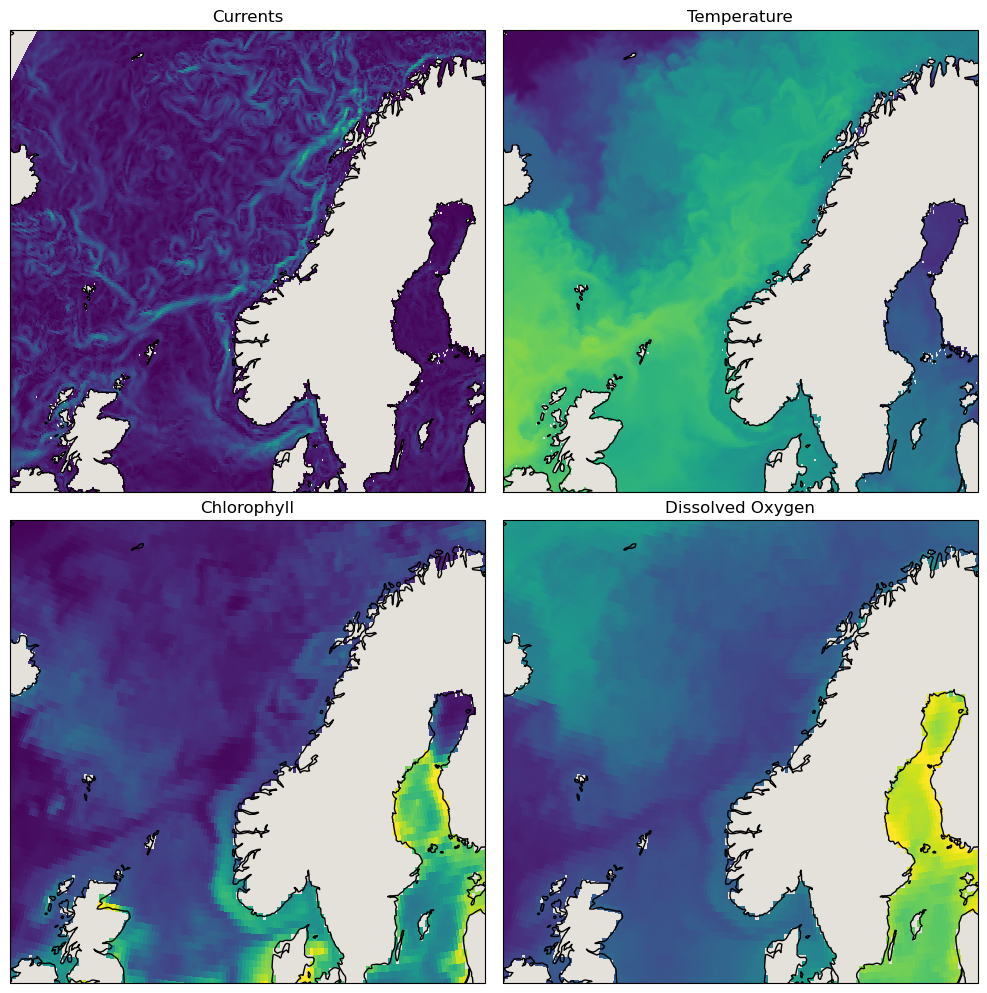

In [ ]:
anim_path = "/home/knowit/Home_Foresee/forseeModel/animation/multivar.gif"
writergif = PillowWriter(fps=10)

anim = animate_map(thetao)
anim.save(anim_path, writer=writergif)

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter
import cartopy


# bfbfbd dark gray
# E4E1DB sand
def animate_map(map_data, epsg="3035", extent=(-9, 22, 55, 72), bgcolor="#E4E1DB"):
    fig = plt.figure(figsize=(5.14, 5), dpi=200, facecolor=bgcolor)
    ax = plt.axes(projection=ccrs.epsg(epsg))
    # ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor="k", facecolor="#E4E1DB")
    ax.set_facecolor(bgcolor)
    ax.set_extent(extent)
    ax.axis("off")
    n_frames = map_data.sizes["time"]

    lon_grid, lat_grid = np.meshgrid(map_data.longitude, map_data.latitude)
    first_frame = map_data.isel(time=0)
    # vmin, vmax = map_data.min(), map_data.max()
    # vmin, vmax = .05, .1
    vmin, vmax = 0.0, 0.5
    # mesh = ax.pcolormesh(lon_grid, lat_grid, first_frame, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    mesh = ax.pcolormesh(
        lon_grid, lat_grid, first_frame, transform=ccrs.PlateCarree(), cmap="viridis"
    )
    plt.tight_layout()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)

    def init():
        return (mesh,)

    def animate(i):
        frame = map_data.isel(time=i)
        mesh.set_array(frame.values.ravel())
        # mesh.set_clim(vmin=0, vmax=img_max)
        return (mesh,)

    anim = FuncAnimation(
        fig, animate, init_func=init, frames=n_frames, interval=500, blit=True
    )

    return anim

In [ ]:
(72 - 55) / (22 + 9)

0.5483870967741935

In [ ]:
thetao = (
    xr.open_dataset(ds_root_path + "CMEMS-GLOBAL_001_024-thetao-2020_2023.nc")
    .isel(depth=0, time=slice(None, 100))
    .thetao
)

In [ ]:
lat_bnds = (49, 82.5)
lon_bnds = (-43.5, 48)
prediction_ir = 0.5
relevant_fish = ["Hyse", "Sei", "Uer (vanlig)", "Lyr", "Torsk", "Breiflabb", "Lange"]

x = np.load("/home/knowit/Home_Foresee/forseeModel/animations/day1_preds.npy")
fish = xr.DataArray(
    x,
    dims=["time", "longitude", "latitude", "fish"],
    coords=dict(
        time=pd.date_range("2022-03-03", "2022-09-30", freq="1D"),
        longitude=np.linspace(*lon_bnds, 184),
        latitude=np.linspace(*lat_bnds, 68),
        # longitude=np.arange(*lon_bnds, prediction_ir),
        # latitude=np.arange(*lat_bnds, prediction_ir),
        fish=relevant_fish,
    ),
)

fish = fish.isel(fish=4, time=slice(None, 100)).transpose(
    "time", "latitude", "longitude"
)

In [ ]:
fish = xr.DataArray(
    upscaled,
    dims=["time", "longitude", "latitude"],
    coords=dict(
        time=pd.date_range(
            "2022-03-03",
            pd.to_datetime("2022-03-03") + pd.to_timedelta("99D"),
            freq="1D",
        ),
        longitude=np.linspace(*lon_bnds, 184 * factor),
        latitude=np.linspace(*lat_bnds, 68 * factor),
    ),
)

fish = fish.transpose("time", "latitude", "longitude")

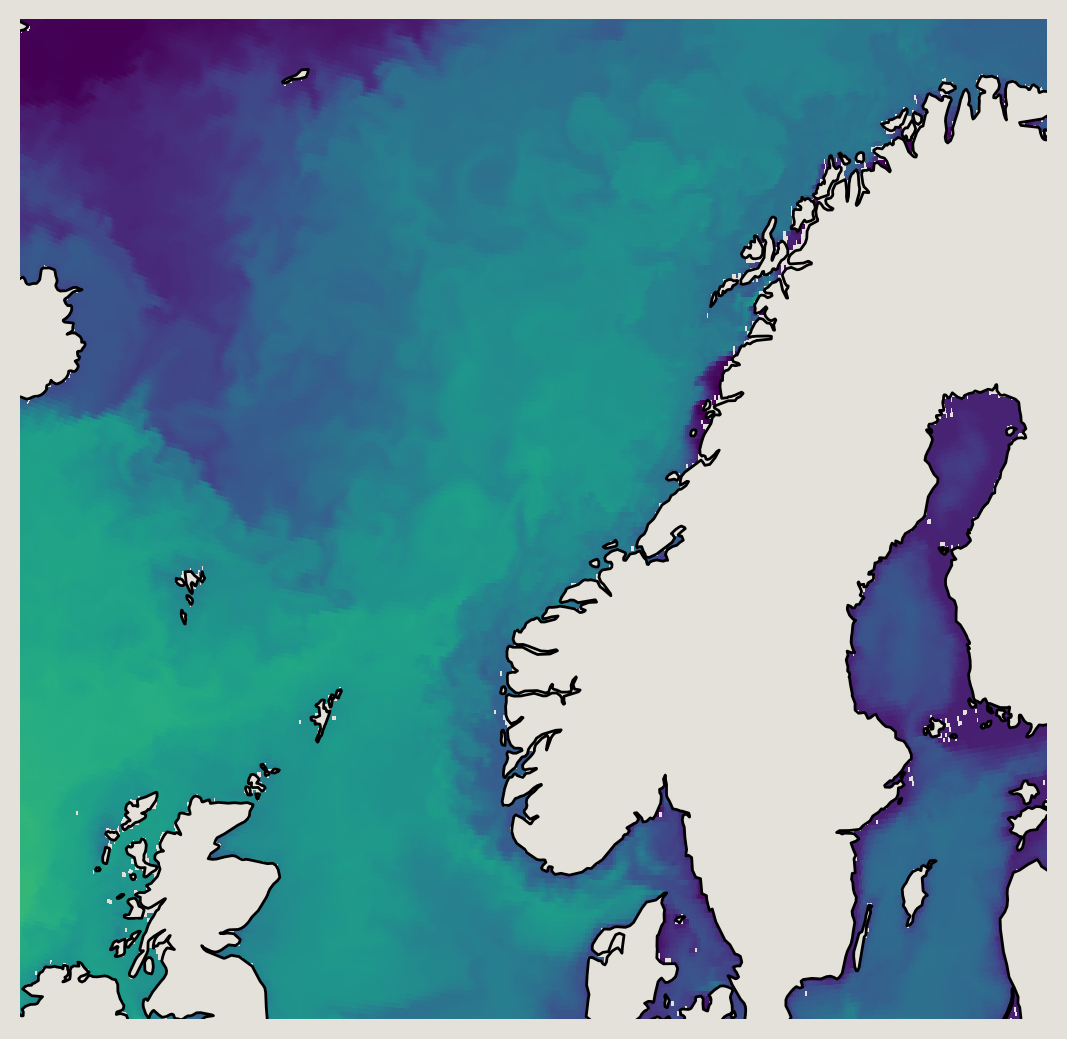

In [ ]:
anim_path = "/home/knowit/Home_Foresee/forseeModel/animations/temperature_no_border.gif"

writergif = PillowWriter(fps=15)

anim = animate_map(thetao)
anim.save(anim_path, writer=writergif)

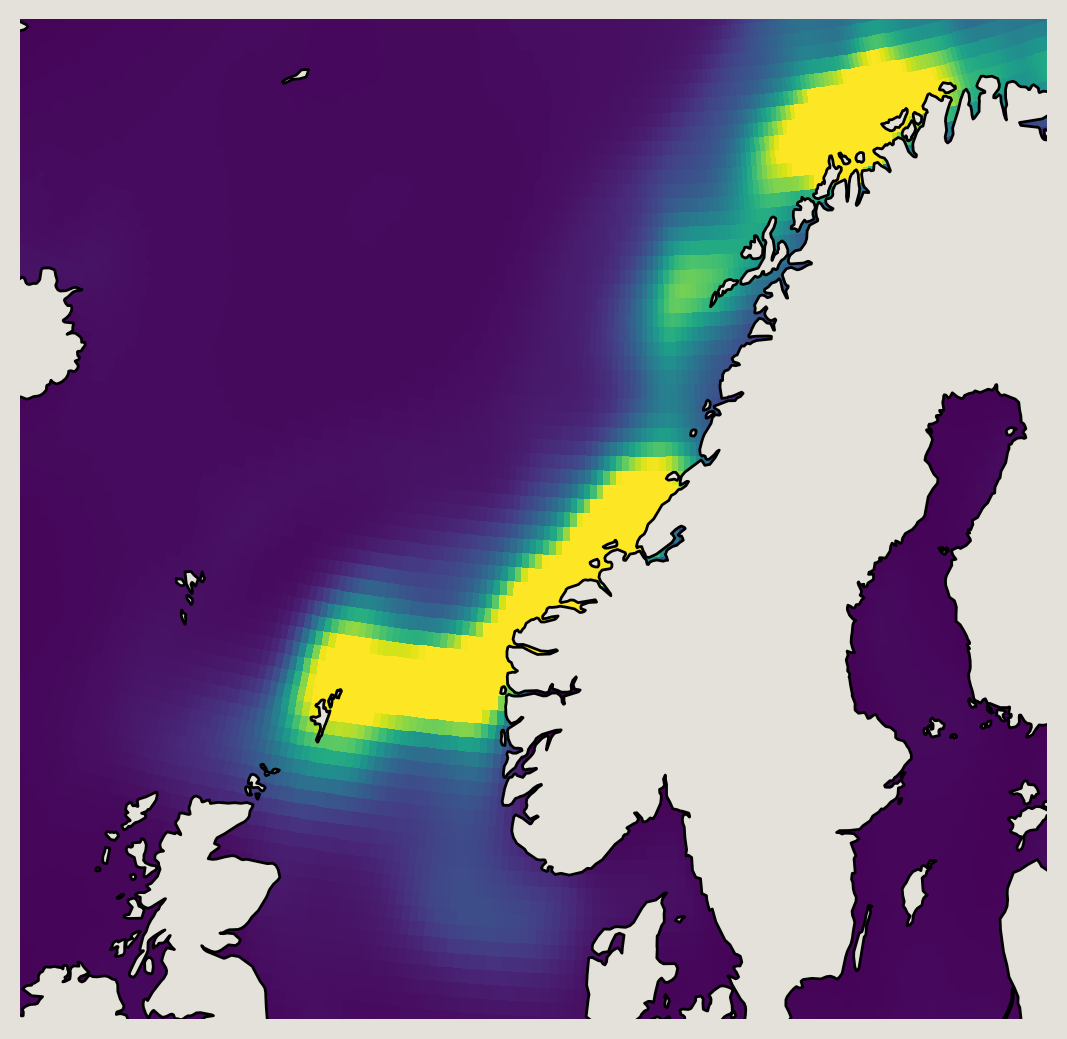

In [ ]:
anim_path = "/home/knowit/Home_Foresee/forseeModel/animations/torsk.gif"

writergif = PillowWriter(fps=15)

anim = animate_map(fish)
anim.save(anim_path, writer=writergif)